Epoch 1/200


C:\Users\smrut\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - loss: 0.0667 - mae: 0.0667 - val_loss: 0.5344 - val_mae: 0.5344
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0514 - mae: 0.0514 - val_loss: 0.4908 - val_mae: 0.4908
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0470 - mae: 0.0470 - val_loss: 0.4582 - val_mae: 0.4582
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0474 - mae: 0.0474 - val_loss: 0.4364 - val_mae: 0.4364
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0448 - mae: 0.0448 - val_loss: 0.4217 - val_mae: 0.4217
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0412 - mae: 0.0412 - val_loss: 0.4077 - val_mae: 0.4077
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0393 - mae: 0.0393 - val_loss: 0.3893 - val_mae: 0.3893
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0389 - mae: 0.0389 - val_loss: 0.3596 - val_mae: 0.3596
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0361 - mae: 0.0361 - va

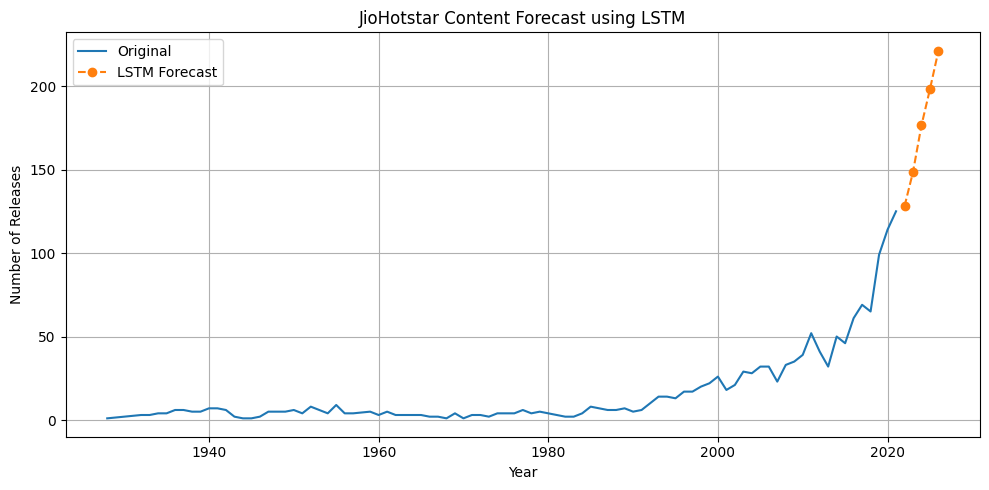

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import random

# Set seeds for reproducibility

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Load and preprocess data (same as before)
df = pd.read_csv("cleaned_hotstar_data.csv")
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df = df.dropna(subset=['release_year'])
release_counts = df['release_year'].value_counts().sort_index()
data = release_counts.values.reshape(-1, 1)
years = release_counts.index.tolist()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences with longer length
seq_len = 5
def create_sequences(data, seq_len=seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, seq_len)

# Build model with dropout and tanh activation
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(X.shape[1], X.shape[2]), recurrent_dropout=0.2),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train with validation split
model.fit(X, y, epochs=200, verbose=1, validation_split=0.1, callbacks=[early_stop])

# Predict next 5 years
last_seq = scaled_data[-seq_len:]
predictions = []
for _ in range(5):
    pred = model.predict(last_seq.reshape(1, seq_len, 1), verbose=0)
    predictions.append(pred[0][0])
    last_seq = np.vstack([last_seq[1:], pred])

# Inverse scale
predicted_counts = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

# Plot
plt.figure(figsize=(10,5))
plt.plot(years, data, label='Original')
plt.plot(range(years[-1]+1, years[-1]+6), predicted_counts, label='LSTM Forecast', linestyle='--', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('JioHotstar Content Forecast using LSTM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build GRU model
model = Sequential([
    GRU(50, activation='tanh', input_shape=(X.shape[1], X.shape[2]), recurrent_dropout=0.2),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Train model
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model.fit(X, y, epochs=200, validation_split=0.1, callbacks=[early_stop], verbose=1)


Epoch 1/200


C:\Users\smrut\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - loss: 0.0633 - mae: 0.0633 - val_loss: 0.5035 - val_mae: 0.5035
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0506 - mae: 0.0506 - val_loss: 0.4477 - val_mae: 0.4477
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0513 - mae: 0.0513 - val_loss: 0.4205 - val_mae: 0.4205
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0448 - mae: 0.0448 - val_loss: 0.4061 - val_mae: 0.4061
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0398 - mae: 0.0398 - val_loss: 0.3926 - val_mae: 0.3926
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0396 - mae: 0.0396 - val_loss: 0.3664 - val_mae: 0.3664
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0361 - mae: 0.0361 - val_loss: 0.3247 - val_mae: 0.3247
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0312 - mae: 0.0312 - val_loss: 0.2754 - val_mae: 0.2754
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0279 - mae: 0.0279 - va

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Reshape input for Conv1D (samples, timesteps, features)
X_cnn = X.reshape((X.shape[0], X.shape[1], X.shape[2]))  # already (samples, timesteps, features)

# Build CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_cnn.shape[1], X_cnn.shape[2])),
    MaxPooling1D(pool_size=1),
    LSTM(50, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Train model
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model.fit(X_cnn, y, epochs=200, validation_split=0.1, callbacks=[early_stop], verbose=1)


Epoch 1/200


C:\Users\smrut\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - loss: 0.0605 - mae: 0.0605 - val_loss: 0.4678 - val_mae: 0.4678
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0448 - mae: 0.0448 - val_loss: 0.4052 - val_mae: 0.4052
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0452 - mae: 0.0452 - val_loss: 0.3683 - val_mae: 0.3683
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0399 - mae: 0.0399 - val_loss: 0.3425 - val_mae: 0.3425
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0341 - mae: 0.0341 - val_loss: 0.3142 - val_mae: 0.3142
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0323 - mae: 0.0323 - val_loss: 0.2659 - val_mae: 0.2659
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0297 - mae: 0.0297 - val_loss: 0.2093 - val_mae: 0.2093
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0222 - mae: 0.0222 - val_loss: 0.1478 - val_mae: 0.1478
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0214 - mae: 0.0214 - va

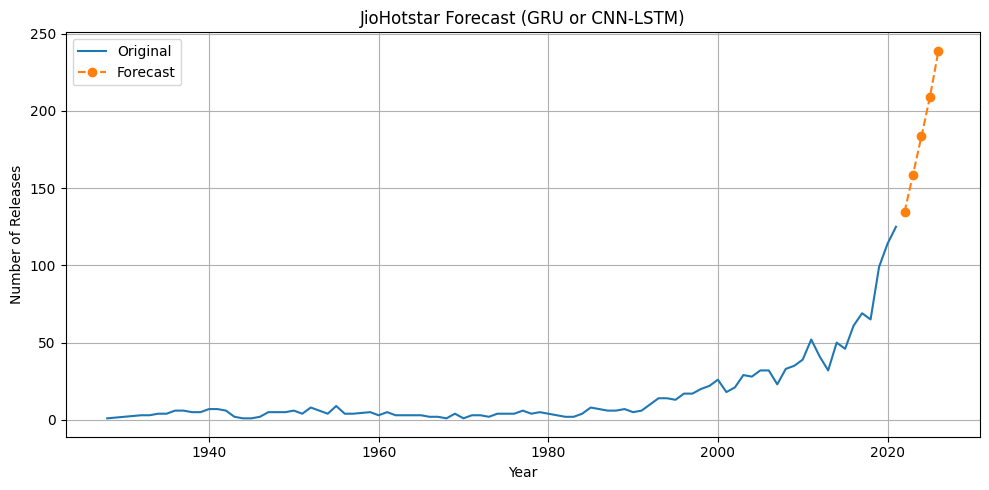

In [9]:
# Prediction (modify input shape for CNN-LSTM if used)
if len(model.input_shape) == 4:  # CNN-LSTM
    last_seq = scaled_data[-seq_len:].reshape(1, seq_len, 1, 1)
else:  # GRU or LSTM
    last_seq = scaled_data[-seq_len:]

predictions = []
for _ in range(5):
    if len(model.input_shape) == 4:
        pred = model.predict(last_seq, verbose=0)
        last_seq = np.vstack([last_seq.reshape(seq_len, 1), pred]).reshape(1, seq_len, 1, 1)
    else:
        pred = model.predict(last_seq.reshape(1, seq_len, 1), verbose=0)
        last_seq = np.vstack([last_seq[1:], pred])
    predictions.append(pred[0][0])

# Inverse transform
predicted_counts = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

# Plot (same as before)
plt.figure(figsize=(10, 5))
plt.plot(years, data, label="Original")
plt.plot(range(years[-1]+1, years[-1]+6), predicted_counts, label="Forecast", linestyle='--', marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.title("JioHotstar Forecast (GRU or CNN-LSTM)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\smrut\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\smrut\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\smrut\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\smrut\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sa

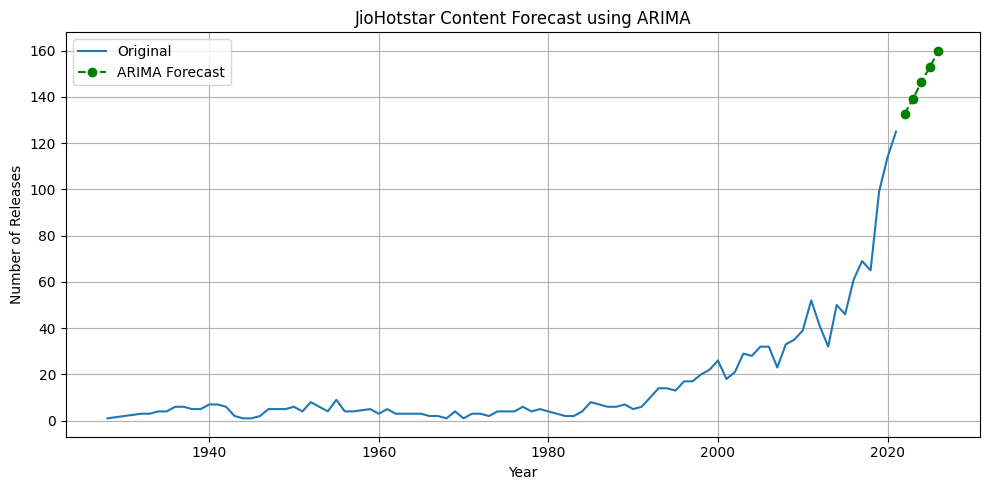

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# Load the cleaned dataset
df = pd.read_csv("cleaned_hotstar_data.csv")

# Convert release_year to numeric
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df = df.dropna(subset=['release_year'])

# Count releases per year
release_counts = df['release_year'].value_counts().sort_index()
data = release_counts.values
years = release_counts.index.astype(int)

# Convert to pandas Series with datetime index (optional)
ts = pd.Series(data, index=pd.Index(years, name="Year"))
# Fit ARIMA (AutoRegressive Integrated Moving Average)
# You can use auto_arima from pmdarima for automatic order selection
model = ARIMA(ts, order=(2,1,2))  # (p,d,q) — you can tune these
model_fit = model.fit()

forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)
forecast_years = range(ts.index[-1] + 1, ts.index[-1] + 1 + forecast_steps)

plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label="Original")
plt.plot(forecast_years, forecast, label="ARIMA Forecast", linestyle='--', marker='o', color='green')
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.title("JioHotstar Content Forecast using ARIMA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
